<a href="https://colab.research.google.com/github/Divyan7/mini-project-on-pandas/blob/main/lab2_AP23110010152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url)

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
print("Shape:", tips.shape)
print("\nInfo:")
print(tips.info())
print("\nDescribe:")
display(tips.describe(include='all'))

Shape: (244, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Describe:


,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.00
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.57
...,...,...,...,...,...,...,...
min,3.070,1.000,NaN,NaN,NaN,NaN,1.00
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.00
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.00
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.00


In [4]:
# Solution: Exercise 0
print("Unique days:", tips['day'].unique())
print("Unique time:", tips['time'].unique())
print("Duplicates:", tips.duplicated().sum())
print("Avg total_bill:", tips['total_bill'].mean())
print("Avg tip:", tips['tip'].mean())

Unique days: ['Sun' 'Sat' 'Thur' 'Fri']
Unique time: ['Dinner' 'Lunch']
Duplicates: 1
Avg total_bill: 19.78594262295082
Avg tip: 2.99827868852459


In [5]:
tips[['total_bill', 'tip']].head()
tips.iloc[0:5]
tips.loc[tips['day']=='Sun', ['total_bill','tip','size']].head()
big_tables = tips[tips['size'] >= 5]
big_tables.head()
lunch_smokers = tips.query("time == 'Lunch' and smoker == 'Yes'")
lunch_smokers.head()


,total_bill,tip,sex,smoker,day,time,size
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2


In [6]:
# Solution: Exercise 1
sat3 = tips[(tips['day']=='Sat') & (tips['size']>=3)]
sat3 = sat3.assign(bill_per_person = sat3['total_bill']/sat3['size'])
sat3_sorted = sat3.sort_values('bill_per_person', ascending=False)
sat3_sorted.head()

,total_bill,tip,sex,smoker,day,time,size,bill_per_person
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.937
102,44.30,2.50,Female,Yes,Sat,Dinner,3,14.767
212,48.33,9.00,Male,No,Sat,Dinner,4,12.082
59,48.27,6.73,Male,No,Sat,Dinner,4,12.068
238,35.83,4.67,Female,No,Sat,Dinner,3,11.943


In [7]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [8]:
tips['sex'] = tips['sex'].astype('category')
tips['smoker'] = tips['smoker'].astype('category')
tips['day'] = tips['day'].astype('category')
tips['time'] = tips['time'].astype('category')
tips.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


In [17]:
tips = tips.rename(columns={'total_bill':'total_bill', 'tip':'tip', 'tip_pct':'tip_pct',
                            'tip_per_person':'tip_per_person'})

In [10]:
tips['server_name'] = [' Alice ', 'Bob', 'ALICE', 'bob', ' Alice ', 'Bob'] * (len(tips)//6) + ['Alice']*(len(tips)%6)
tips['server_name'] = tips['server_name'].str.strip().str.title()
tips['server_name'].head()

,server_name
0,Alice
1,Bob
2,Alice
3,Bob
4,Alice


In [11]:
demo = tips.copy()
demo = pd.concat([demo, demo.iloc[0:2]], ignore_index=True)  # add 2 duplicate rows
print("Before drop_duplicates:", demo.shape)
demo = demo.drop_duplicates()
print("After drop_duplicates:", demo.shape)

Before drop_duplicates: (246, 8)
After drop_duplicates: (243, 8)


In [13]:
# Solution: Exercise 2
tips['size'] = tips['size'].astype('int64')

# Add the missing columns
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_per_person'] = tips['tip'] / tips['size']

tips_clean = tips[['total_bill','tip','tip_pct','tip_per_person','sex','smoker','day','time','size']].copy()
print("Duplicates in tips_clean:", tips_clean.duplicated().sum())

Duplicates in tips_clean: 1


In [14]:
rng = np.random.default_rng(42)
tips_na = tips_clean.copy()
mask = rng.choice([True, False], size=len(tips_na), p=[0.1, 0.9])
tips_na.loc[mask, 'tip'] = np.nan  # inject ~10% NaNs in 'tip'
tips_na.loc[mask, 'size'] = np.nan # inject NaNs in 'size' as well

tips_na.isna().sum()

,0
total_bill,0
tip,21
tip_pct,0
tip_per_person,0
sex,0
smoker,0
day,0
time,0
size,21


In [15]:
dropped = tips_na.dropna()
dropped.shape

(223, 9)

In [16]:
filled_const = tips_na.fillna({'tip': tips_na['tip'].median(), 'size': tips_na['size'].median()})
filled_const.isna().sum()

,0
total_bill,0
tip,0
tip_pct,0
tip_per_person,0
sex,0
smoker,0
day,0
time,0
size,0


In [22]:
tips_group_fill = tips_na.copy()
tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))
tips_group_fill.isna().sum()

/tmp/ipython-input-1629360651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))


,0
total_bill,0
tip,0
tip_pct,0
tip_per_person,0
sex,0
smoker,0
day,0
time,0
size,21


In [20]:
tips_interp = tips_na.sort_values('total_bill').select_dtypes(include=np.number).interpolate()
tips_interp.isna().sum()

,0
total_bill,0
tip,0
tip_pct,0
tip_per_person,0
size,0


In [21]:
# Solution: Exercise 3
step1 = tips_na[~(tips_na['tip'].isna() & tips_na['size'].isna())].copy()
mean_size_by_day = step1.groupby('day')['size'].transform('mean').round()
step2 = step1.copy()
step2['size'] = step2['size'].fillna(mean_size_by_day)
step2.isna().sum()

/tmp/ipython-input-2476399424.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_size_by_day = step1.groupby('day')['size'].transform('mean').round()


,0
total_bill,0
tip,0
tip_pct,0
tip_per_person,0
sex,0
smoker,0
day,0
time,0
size,0


In [23]:
print("Overall tip %:", (tips['tip'].sum()/tips['total_bill'].sum()).round(3))
print("\nCounts by day:")
print(tips['day'].value_counts())

print("\nSmoker ratio by time:")
print((tips.groupby('time')['smoker'].value_counts(normalize=True)*100).round(1))

Overall tip %: 0.152

Counts by day:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Smoker ratio by time:
time    smoker
Dinner  No        60.2
        Yes       39.8
Lunch   No        66.2
        Yes       33.8
Name: proportion, dtype: float64


/tmp/ipython-input-712098433.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print((tips.groupby('time')['smoker'].value_counts(normalize=True)*100).round(1))


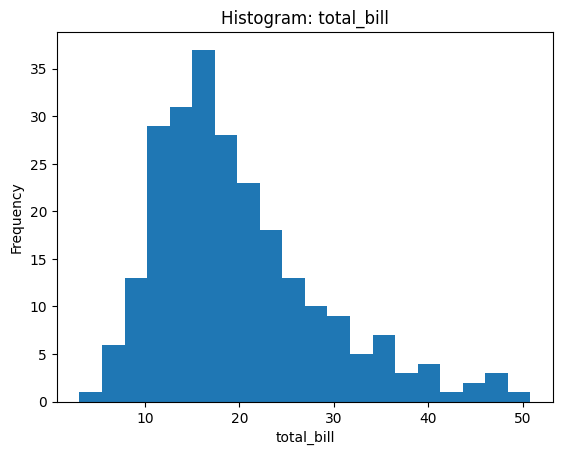

In [24]:
plt.figure()
plt.hist(tips['total_bill'].dropna(), bins=20)
plt.title('Histogram: total_bill')
plt.xlabel('total_bill')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-1093001054.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=list(tips['day'].cat.categories))


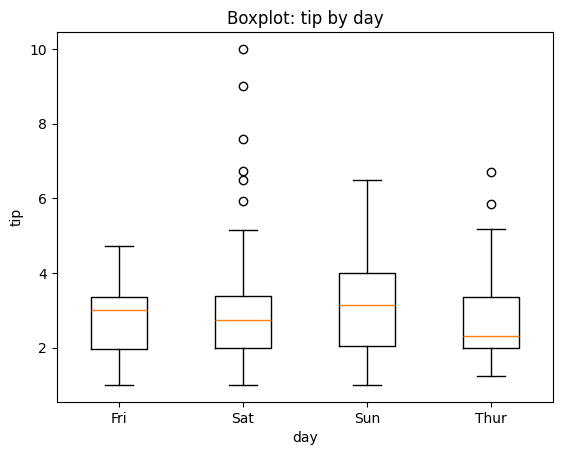

In [25]:
plt.figure()
data = [tips.loc[tips['day']==d, 'tip'].dropna().values for d in tips['day'].cat.categories]
plt.boxplot(data, labels=list(tips['day'].cat.categories))
plt.title('Boxplot: tip by day')
plt.xlabel('day')
plt.ylabel('tip')
plt.show()

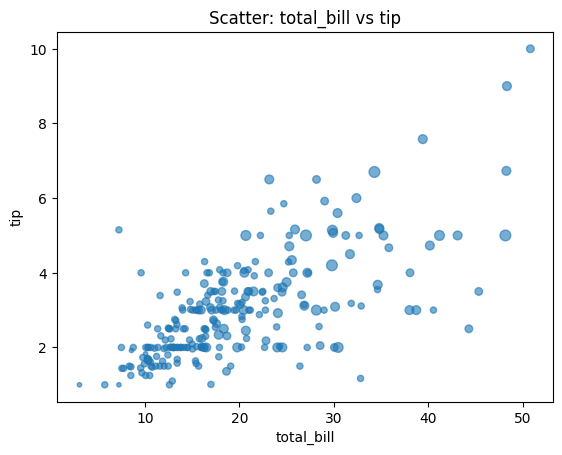

In [26]:
plt.figure()
plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

/tmp/ipython-input-2804889101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_pct = tips.groupby('day')['tip_pct'].mean()


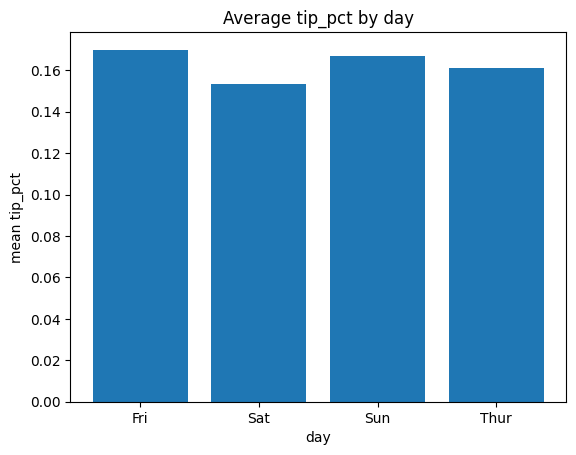

In [27]:
avg_tip_pct = tips.groupby('day')['tip_pct'].mean()
plt.figure()
plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average tip_pct by day')
plt.xlabel('day')
plt.ylabel('mean tip_pct')
plt.show()

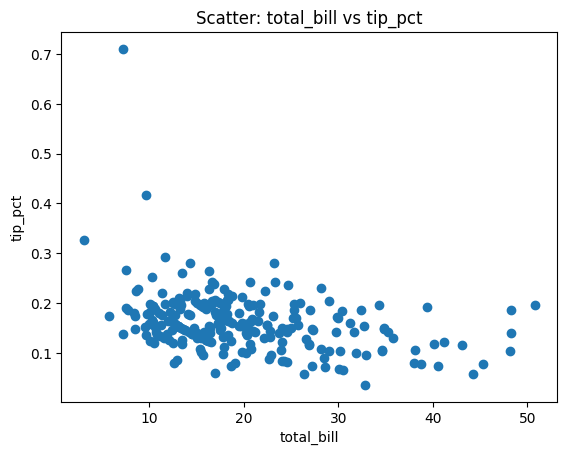

/tmp/ipython-input-245809616.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med = tips.groupby('time')['total_bill'].median()


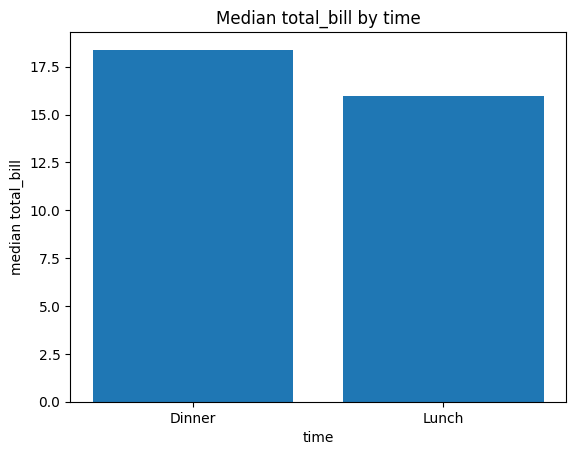

In [28]:
plt.figure()
plt.scatter(tips['total_bill'], tips['tip_pct'])
plt.title('Scatter: total_bill vs tip_pct')
plt.xlabel('total_bill'); plt.ylabel('tip_pct'); plt.show()

med = tips.groupby('time')['total_bill'].median()
plt.figure()
plt.bar(med.index.astype(str), med.values)
plt.title('Median total_bill by time')
plt.xlabel('time'); plt.ylabel('median total_bill'); plt.show()

In [29]:
g = (tips
     .groupby(['day','time'])
     .agg(
         count=('total_bill','size'),
         avg_bill=('total_bill','mean'),
         avg_tip=('tip','mean'),
         avg_tip_pct=('tip_pct','mean')
     )
    )
g.head()

/tmp/ipython-input-2542446633.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['day','time'])


count  avg_bill  avg_tip  avg_tip_pct
day time                                         
Fri Dinner     12    19.663    2.940        0.159
    Lunch       7    12.846    2.383        0.189
Sat Dinner     87    20.441    2.993        0.153
    Lunch       0       NaN      NaN          NaN
Sun Dinner     76    21.410    3.255        0.167

In [30]:
def pct_above_20(s):
    return (s > 0.20).mean()

custom = tips.groupby('day')['tip_pct'].apply(pct_above_20)
custom

/tmp/ipython-input-2530599337.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  custom = tips.groupby('day')['tip_pct'].apply(pct_above_20)


,tip_pct
day,
Fri,0.211
Sat,0.115
Sun,0.197
Thur,0.161


In [31]:
day_lookup = pd.DataFrame({
    'day':['Thur','Fri','Sat','Sun'],
    'is_weekend':[False, False, True, True]
})

tips_merge = tips.merge(day_lookup, on='day', how='left')
tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day')

,day,is_weekend
90,Fri,False
19,Sat,True
0,Sun,True
77,Thur,False


In [32]:
# Solution: Exercise 5
part1 = tips.groupby(['smoker','sex']).agg(total_revenue=('total_bill','sum'),
                                           total_tips=('tip','sum'))
display(part1)

time_map = pd.DataFrame({'time':['Lunch','Dinner'], 'meal_code':['L','D']})
part2 = tips.merge(time_map, on='time', how='left')
display(part2[['time','meal_code']].drop_duplicates())

/tmp/ipython-input-1645422752.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  part1 = tips.groupby(['smoker','sex']).agg(total_revenue=('total_bill','sum'),


total_revenue  total_tips
smoker sex                              
No     Female         977.68      149.77
       Male          1919.75      302.00
Yes    Female         593.27       96.74
       Male          1337.07      183.07

,time,meal_code
0,Dinner,D
77,Lunch,L


In [33]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
piv

/tmp/ipython-input-2368883593.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')


time,Dinner,Lunch
day,,
Fri,0.159,0.189
Sat,0.153,NaN
Sun,0.167,NaN
Thur,0.160,0.161


In [34]:
stacked = piv.stack()
unstacked = stacked.unstack()
unstacked

time,Dinner,Lunch
day,,
Fri,0.159,0.189
Sat,0.153,NaN
Sun,0.167,NaN
Thur,0.160,0.161


In [35]:
long = tips[['day','time','total_bill','tip']].melt(id_vars=['day','time'],
                                                    var_name='metric',
                                                    value_name='value')
long.head()

,day,time,metric,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59


In [36]:
# Solution: Exercise 6
piv2 = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='mean')
long2 = piv2.reset_index().melt(id_vars=['size'], var_name='day', value_name='mean_total_bill')
display(piv2); display(long2.head())

/tmp/ipython-input-2395920819.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv2 = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='mean')


day,Fri,Sat,Sun,Thur
size,,,,
1,8.580,5.160,NaN,10.070
2,16.322,16.837,17.560,15.157
3,15.980,25.509,22.184,19.160
4,40.170,29.876,26.688,29.950
5,NaN,28.150,27.000,41.190
6,NaN,NaN,48.170,30.383


,size,day,mean_total_bill
0,1,Fri,8.580
1,2,Fri,16.322
2,3,Fri,15.980
3,4,Fri,40.170
4,5,Fri,NaN


Top 5 most generous tipping times:
day   time  
Fri   Lunch     0.189
Sun   Dinner    0.167
Thur  Lunch     0.161
      Dinner    0.160
Fri   Dinner    0.159
dtype: float64


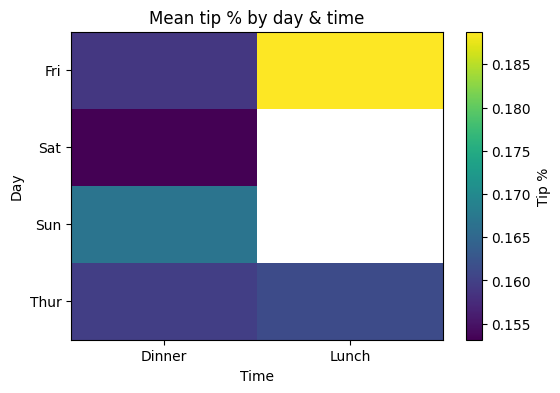

In [43]:
#Mini project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url)

tips['tip_pct'] = tips['tip'] / tips['total_bill']

piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')

print("Top 5 most generous tipping times:")
print(piv.stack().sort_values(ascending=False).head(5))

plt.figure(figsize=(6, 4))
plt.imshow(piv.values, aspect='auto', cmap='viridis')  # added cmap for better visuals
plt.title('Mean tip % by day & time')
plt.xlabel('Time')
plt.ylabel('Day')
plt.xticks(ticks=range(len(piv.columns)), labels=piv.columns.astype(str))
plt.yticks(ticks=range(len(piv.index)), labels=piv.index.astype(str))
plt.colorbar(label='Tip %')
plt.show()